Backpropagation Algorithm | Ruchi Manikrao Dhore | W1652116

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Epoch :  0 , Loss :  270.35459516965483
Epoch :  10 , Loss :  11.265378139084145


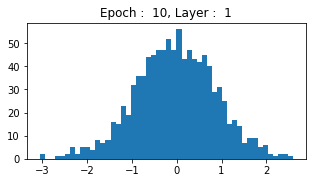

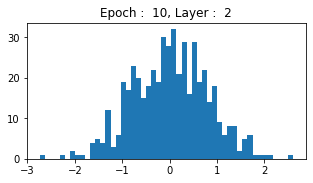

Epoch :  20 , Loss :  9.755909546110392


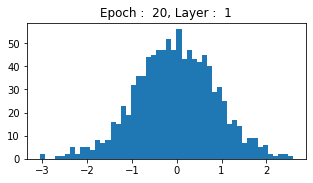

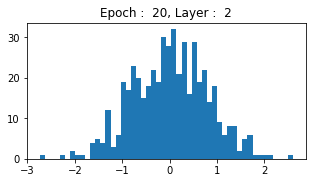

Epoch :  30 , Loss :  9.027009176862238
Epoch :  40 , Loss :  8.460864391054077
Epoch :  50 , Loss :  7.995670413779304


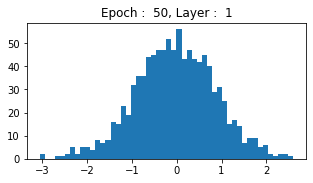

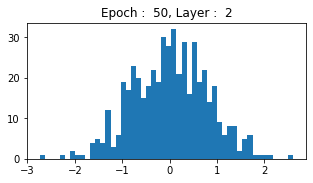

Epoch :  60 , Loss :  7.607479330885923
Epoch :  70 , Loss :  7.280279652829432
Epoch :  80 , Loss :  7.002079485606295


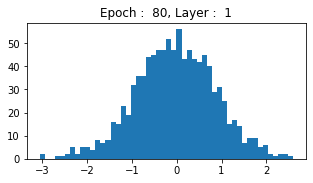

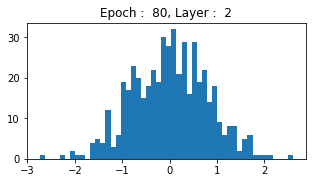

Epoch :  90 , Loss :  6.763609650875496


In [49]:
# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# To initialize weights and biases randomly
def initialize_weights_and_biases(ip_units, hidden_units, op_units):
    wt_1 = np.random.randn(ip_units, hidden_units)
    biases_1 = np.zeros((1, hidden_units))
    wt_2 = np.random.randn(hidden_units, op_units)
    biases_2 = np.zeros((1, output_units))
    return wt_1, biases_1, wt_2, biases_2

# To feed forward
def forward(X, wt_1, biases_1, wt_2, biases_2):
    hidden_layer = sigmoid(np.dot(X, wt_1) + biases_1)
    op_layer = np.dot(hidden_layer, wt_2) + biases_2
    return hidden_layer, op_layer

# Backpropagation
def backpropagation(X, y, hidden_layer, op_layer, wt_1, wt_2):
    m = X.shape[0]
    d_output = op_layer - y
    d_wt_2 = np.dot(hidden_layer.T, d_output) / m
    d_biases_2 = np.sum(d_output, axis=0, keepdims=True) / m
    d_hidden = np.dot(d_output, wt_2.T) * sigmoid_derivative(hidden_layer)
    d_wt_1 = np.dot(X.T, d_hidden) / m
    d_biases_1 = np.sum(d_hidden, axis=0, keepdims=True) / m
    return d_wt_1, d_biases_1, d_wt_2, d_biases_2

# To update weights and biases
def update_weights_and_biases(wt_1, biases_1, wt_2, biases_2, d_wt_1, d_biases_1, d_wt_2, d_biases_2, learning_rate=0.1):
    wt_1 -= learning_rate * d_wt_1
    biases_1 -= learning_rate * d_biases_1
    wt_2 -= learning_rate * d_wt_2
    biases_2 -= learning_rate * d_biases_2
    return wt_1, biases_1, wt_2, biases_2

# To calculate mean squared error
def mean_squared_error(y_pred, y_true):
    m = y_true.shape[0]
    error = np.sum((y_pred - y_true) ** 2) / m
    return error

# train the neural network
def train(X, y, ip_units, hidden_units, op_units, epochs, learning_rate):
    losses = []
    wt_1, biases_1, wt_2, biases_2 = initialize_weights_and_biases(ip_units, hidden_units, op_units)
    for i in range(epochs):
      hidden_layer, op_layer = forward(X, wt_1, biases_1, wt_2, biases_2)
      loss = mean_squared_error(op_layer, y)
      losses.append(loss)
      d_wt_1, d_biases_1, d_wt_2, d_biases_2 = backpropagation(X, y, hidden_layer, op_layer, wt_1, wt_2)
      wt_1, biases_1, wt_2, biases_2 = update_weights_and_biases(wt_1, biases_1, wt_2, biases_2, d_wt_1, d_biases_1, d_wt_2, d_biases_2, learning_rate)
    
    # plot the training loss every 10 epochs
      if i % 10 == 0:
          print("Epoch : ", i, ", Loss : ", loss)
    
    # plot the distribution of weights every 10 epochs
      if i in [10, 20, 50, 80, 100]:
          weights = [weights_1, weights_2]
          plot_weights_distribution(weights, i)
        
    return losses, wt_1, biases_1, wt_2, biases_2

# To plot weights distribution
def plot_weights_distribution(weights, epoch):
    for i, w in enumerate(weights):
      plt.figure(figsize=(5, 2.5), facecolor="white", linewidth=0.7)
      plt.hist(w.flatten(), bins=50)
      plt.title("Epoch :  " + str(epoch) + ", Layer :  " + str(i+1))
      plt.show()  

X = np.random.randn(1000, 10)
y = np.random.randn(1000, 1)
hidden_units = 100
hidden_layers = 10
output_units = 5
epochs = 100
learning_rate = 0.1

losses, weights_1, biases_1, weights_2, biases_2 = train(X, y, ip_units=X.shape[1], hidden_units=hidden_units, op_units=output_units, epochs=epochs, learning_rate=learning_rate)
